# EDA

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

## Import data

In [2]:
df = pd.read_csv('avocado.csv');
df = df.drop(['Unnamed: 0'], axis=1)
titles = ['date', 'priceAvg','volume', 'cat1', 'cat2', 'cat3', 'totalBags', 'smallBags', 'largeBags', 'xlBags', 'type', 'year', 'region']
df = df.rename(columns=dict(zip(df.columns, titles)))
df.head()

,date,priceAvg,volume,cat1,cat2,cat3,totalBags,smallBags,largeBags,xlBags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Normalize categories into percentages

#### Drop column and normalize the values of its children

In [3]:
def normalizeAndDrop (df, base, children):
    for child in children:
        df[child] = (df[child]/df[base])
    df.drop([base], axis=1, inplace=True)

#### Create a new column for the categories so we can use the new function

In [4]:
totalCats = df['cat1'] + df['cat2'] + df['cat3']
df['totalCats'] = totalCats

#### Apply the function on the totalBags and the totalCats

In [5]:
normalizeAndDrop(df, 'totalBags', ['smallBags', 'largeBags', 'xlBags'])
normalizeAndDrop(df, 'totalCats', ['cat1', 'cat2', 'cat3'])

#### Scale volume

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['volume', 'year']] = scaler.fit_transform(df[['volume', 'year']])

#### Date casting (From string to timestamp)

In [7]:
df['date'] = pd.to_datetime(df['date'])
type(df.date[0])

pandas._libs.tslibs.timestamps.Timestamp

## Visualize the data

In [8]:
df.head()

,date,priceAvg,volume,cat1,cat2,cat3,smallBags,largeBags,xlBags,type,year,region
0,2015-12-27,1.33,0.001026,0.018667,0.980466,0.000867,0.989278,0.010722,0.0,conventional,0.0,Albany
1,2015-12-20,1.35,0.000877,0.014861,0.983853,0.001286,0.989744,0.010256,0.0,conventional,0.0,Albany
2,2015-12-13,0.93,0.001890,0.007220,0.991595,0.001186,0.987338,0.012662,0.0,conventional,0.0,Albany
3,2015-12-06,1.08,0.001262,0.015468,0.983540,0.000992,0.976982,0.023018,0.0,conventional,0.0,Albany
4,2015-11-29,1.28,0.000815,0.020989,0.977321,0.001689,0.968032,0.031968,0.0,conventional,0.0,Albany


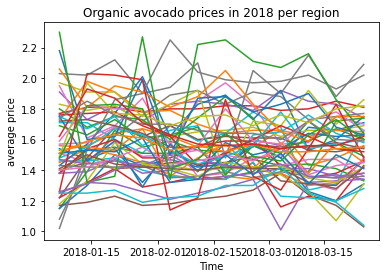

In [9]:
only2018 = df.loc[df['date']>'1/1/2018'];

pyplot.xlabel("Time");
pyplot.ylabel("average price");
for reg in only2018['region'].unique():
    tempDf = (only2018.loc[df['region']==reg]).loc[df['type']=='organic']
    pyplot.plot(tempDf.date, tempDf.priceAvg, label=reg)
pyplot.title("Organic avocado prices in 2018 per region")
pyplot.show();

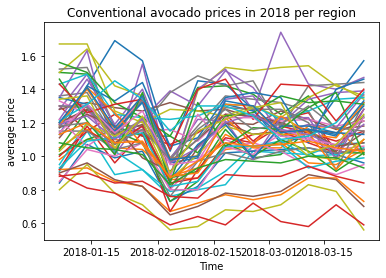

In [10]:
only2018 = df.loc[df['date']>'1/1/2018'];

pyplot.xlabel("Time");
pyplot.ylabel("average price");
for reg in only2018['region'].unique():
    tempDf = (only2018.loc[df['region']==reg]).loc[df['type']=='conventional']
    pyplot.plot(tempDf.date, tempDf.priceAvg, label=reg)
pyplot.title("Conventional avocado prices in 2018 per region")
pyplot.show();

Text(0.5, 1.0, 'Organic avocado prices in Albany')

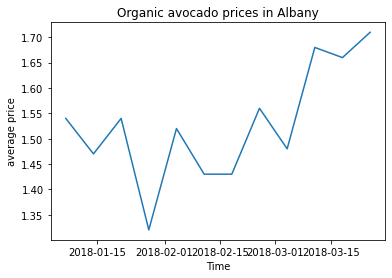

In [11]:
tempDf = only2018.loc[df['region']=='Albany'].loc[df['type']=='organic']
pyplot.plot(tempDf.date, tempDf.priceAvg, label='Albany')
pyplot.xlabel("Time");
pyplot.ylabel("average price");
pyplot.title("Organic avocado prices in Albany")

Text(0.5, 1.0, 'Conventional avocado prices in Albany')

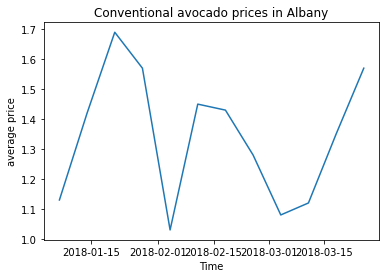

In [12]:
tempDf = only2018.loc[df['region']=='Albany'].loc[df['type']=='conventional']
pyplot.plot(tempDf.date, tempDf.priceAvg, label='Albany')
pyplot.xlabel("Time");
pyplot.ylabel("average price");
pyplot.title("Conventional avocado prices in Albany")

## Pre Processing

In [13]:
df = df.dropna();
df = pd.get_dummies(df, columns=['region', 'type'], drop_first=True);
df['date'] = df['date'].map(pd.datetime.toordinal);
y = df['priceAvg']
X = df.drop(['priceAvg'], axis=1);

/home/nizar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df

,date,priceAvg,volume,cat1,cat2,cat3,smallBags,largeBags,xlBags,year,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
0,735959,1.33,0.001026,0.018667,0.980466,0.000867,0.989278,0.010722,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,735952,1.35,0.000877,0.014861,0.983853,0.001286,0.989744,0.010256,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,735945,0.93,0.001890,0.007220,0.991595,0.001186,0.987338,0.012662,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,735938,1.08,0.001262,0.015468,0.983540,0.000992,0.976982,0.023018,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,735931,1.28,0.000815,0.020989,0.977321,0.001689,0.968032,0.031968,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,736729,1.63,0.000272,0.572390,0.427610,0.000000,0.968008,0.031992,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
18245,736722,1.71,0.000221,0.257765,0.742235,0.000000,0.964943,0.035057,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
18246,736715,1.87,0.000219,0.272585,0.560939,0.166476,0.995496,0.004504,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
18247,736708,1.93,0.000258,0.291773,0.569370,0.138857,0.995442,0.004558,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=31)

## Training Models

In [16]:
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
regr = linear_model.LinearRegression()
svm = SVR(C=10.0, epsilon=0.01)
randomForest = RandomForestRegressor(max_depth=2, random_state=31)
randomForest2 = RandomForestRegressor(max_depth=4, random_state=31)
randomForest3 = RandomForestRegressor(max_depth=5, random_state=31)
adaBoost = AdaBoostRegressor(random_state=31, n_estimators=100)
xgb1 =  xgb.XGBRegressor(objective = "reg:squarederror", random_state=31)

models = [regr, svm, randomForest, randomForest2, adaBoost, xgb1]

results = []


for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    r2  = r2_score(y_test,y_pred)
    name = type(model).__name__
    results.append([name, mse,r2])


results = pd.DataFrame(results)
results.columns = ['name', 'mse', 'r2']
results = results.set_index('name')

In [18]:
np.sqrt(results['mse'])

name
LinearRegression         0.248995
SVR                      0.400081
RandomForestRegressor    0.295538
RandomForestRegressor    0.249221
AdaBoostRegressor        0.265286
XGBRegressor             0.126619
Name: mse, dtype: float64

In [19]:
results

,mse,r2
name,,
LinearRegression,0.061999,0.611830
SVR,0.160065,-0.002153
RandomForestRegressor,0.087343,0.453154
RandomForestRegressor,0.062111,0.611126
AdaBoostRegressor,0.070377,0.559376
XGBRegressor,0.016032,0.899622


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fde60053cf8>,
      dtype=object)

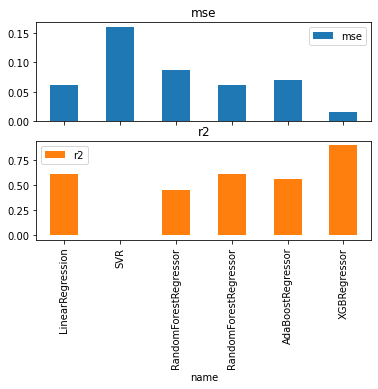

In [20]:
results.plot.bar(subplots=True)

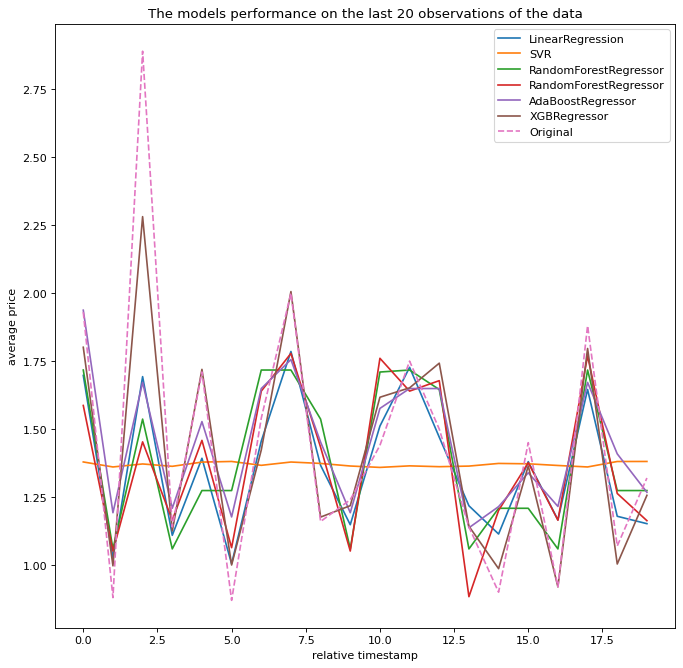

In [21]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
howfar = 20
obs = x_test.tail(howfar)

for model in models:
#     model.fit(x_train, y_train)
    y_pred = model.predict(obs)
    pyplot.plot(y_pred, label=type(model).__name__)
pyplot.plot(np.array(y_test.tail(howfar)), linestyle='dashed', markersize=12, label="Original")
pyplot.legend()
pyplot.title("The models performance on the last 20 observations of the data")
pyplot.ylabel("average price");
pyplot.xlabel("relative timestamp")
pyplot.show()

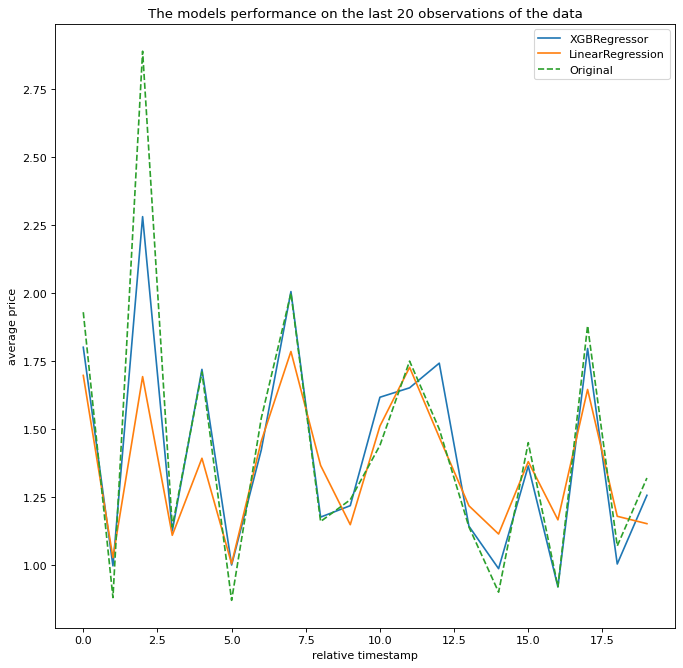

In [22]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
howfar = 20
obs = x_test.tail(howfar)

for model in [xgb1, regr]:
#     model.fit(x_train, y_train)
    y_pred = model.predict(obs)
    pyplot.plot(y_pred, label=type(model).__name__)
pyplot.plot(np.array(y_test.tail(howfar)), linestyle='dashed', markersize=12, label="Original")
pyplot.legend()
pyplot.title("The models performance on the last 20 observations of the data")
pyplot.ylabel("average price");
pyplot.xlabel("relative timestamp")
pyplot.show()